## INTRODUCTION





Abstractive Summarization:

Generation-based: Abstractive summarization methods generate a summary by paraphrasing and rephrasing the original text in a more concise form. These methods often employ deep learning models such as recurrent neural networks (RNNs), transformers, or sequence-to-sequence models with attention mechanisms to understand and generate human-like summaries.



BART, or Bidirectional and Auto-Regressive Transformers, is a sequence-to-sequence model introduced by Lewis et al. (2019). It is a denoising autoencoder for pretraining sequence-to-sequence models and can be fine-tuned for a variety of natural language processing (NLP) tasks, including text summarization, machine translation, and text generation.BART is part of the Hugging Face Transformers library. Hugging Face Transformers is an open-source library that provides easy access to a wide range of pre-trained transformer models, including BART. These models can be used for various natural language processing (NLP) tasks such as text classification, machine translation, text generation, and summarization.
Overall, BART represents a powerful and versatile architecture for sequence-to-sequence modeling in NLP, with applications across a wide range of tasks and domains.

APPROACH TO THE PROBLEM:


*   Data Analysis

*   Data Preprocessing

*   Data Split

*   Modeling

*   Fine tuning for the dialogue summarization task

*   Training
*   Evaluating the results


*   Deploying


*   Comprehensive preprocessing pipeline

*   Conclusion






In [ ]:
!unzip '/content/archive (19).zip'

Archive:  /content/archive (19).zip
  inflating: CSV/hiddentest_dialogue.csv  
  inflating: CSV/hiddentest_topic.csv  
  inflating: CSV/test.csv            
  inflating: CSV/train.csv           
  inflating: CSV/validation.csv      
  inflating: JSONL/hiddentest_dialogue.jsonl  
  inflating: JSONL/hiddentest_topic.jsonl  
  inflating: JSONL/test.jsonl        
  inflating: JSONL/train.jsonl       
  inflating: JSONL/validation.jsonl  


Importing libraries

In [ ]:
!pip install datasets
# Data Handling
import pandas as pd
import numpy as np


# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

# Transformers
from transformers import BartTokenizer, BartForConditionalGeneration      # BERT Tokenizer and architecture
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline                                         # Pipeline
from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data
import torch                                                              # PyTorch

import re                                                                 # This library allows us to clean text data
import nltk                                                               # Natural Language Toolkit
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

To see all the text in each column, we adjust the column width

In [ ]:
pd.set_option('display.max_colwidth', 1000)

## Data Analysis

In [ ]:
# Loading data
train = pd.read_csv('/content/CSV/train.csv')
test = pd.read_csv('/content/CSV/test.csv')
val = pd.read_csv('/content/CSV/validation.csv')

Joining all three dataframes together for easy analysis

In [ ]:
# Concatenate vertically
df = pd.concat([train, test, val], ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14460 non-null  object
 1   dialogue  14460 non-null  object
 2   summary   14460 non-null  object
 3   topic     14460 non-null  object
dtypes: object(4)
memory usage: 452.0+ KB




*   Total Entries (Rows): The DataFrame contains 14,460 rows, meaning you have 14,460 dialogue samples.



*   Columns: There are 4 columns:

id: Unique identifier for each dialogue.

dialogue: Contains the text of the dialogues.

summary: Holds the summary of each dialogue.

topic: The topic related to each dialogue.

Data Types: All columns are of type object, which means they are stored as text data.



*  No Missing Data: All 14,460 rows have values for every column (no missing or null values).


*   Memory Usage: The dataset takes up around 452 KB in memory.



Checking for null columns and duplicates

In [ ]:
# Check for null columns
null_columns = df.columns[df.isnull().any()]

# Print the null columns if any
if len(null_columns) > 0:
    print("Null columns found:")
    print(null_columns)
else:
    print("No null columns found.")

No null columns found.


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


Lets look at the first 20 rows of the dataset

In [ ]:
df.head(20)

,id,dialogue,summary,topic
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here today?\n#Person2#: I found it would be a good idea to get a check-up.\n#Person1#: Yes, well, you haven't had one for 5 years. You should have one every year.\n#Person2#: I know. I figure as long as there is nothing wrong, why go see the doctor?\n#Person1#: Well, the best way to avoid serious illnesses is to find out about them early. So try to come at least once a year for your own good.\n#Person2#: Ok.\n#Person1#: Let me see here. Your eyes and ears look fine. Take a deep breath, please. Do you smoke, Mr. Smith?\n#Person2#: Yes.\n#Person1#: Smoking is the leading cause of lung cancer and heart disease, you know. You really should quit.\n#Person2#: I've tried hundreds of times, but I just can't seem to kick the habit.\n#Person1#: Well, we have classes and some medications that might help. I'll give you more information before you leave.\n#Person2#: Ok, thanks doctor.","Mr. Smith's getting a check-up, and Doctor Hawkins advises him to have one every year. Hawkins'll give some information about their classes and medications to help Mr. Smith quit smoking.",get a check-up
1,train_1,"#Person1#: Hello Mrs. Parker, how have you been?\n#Person2#: Hello Dr. Peters. Just fine thank you. Ricky and I are here for his vaccines.\n#Person1#: Very well. Let's see, according to his vaccination record, Ricky has received his Polio, Tetanus and Hepatitis B shots. He is 14 months old, so he is due for Hepatitis A, Chickenpox and Measles shots.\n#Person2#: What about Rubella and Mumps?\n#Person1#: Well, I can only give him these for now, and after a couple of weeks I can administer the rest.\n#Person2#: OK, great. Doctor, I think I also may need a Tetanus booster. Last time I got it was maybe fifteen years ago!\n#Person1#: We will check our records and I'll have the nurse administer and the booster as well. Now, please hold Ricky's arm tight, this may sting a little.",Mrs Parker takes Ricky for his vaccines. Dr. Peters checks the record and then gives Ricky a vaccine.,vaccines
2,train_2,"#Person1#: Excuse me, did you see a set of keys?\n#Person2#: What kind of keys?\n#Person1#: Five keys and a small foot ornament.\n#Person2#: What a shame! I didn't see them.\n#Person1#: Well, can you help me look for it? That's my first time here.\n#Person2#: Sure. It's my pleasure. I'd like to help you look for the missing keys.\n#Person1#: It's very kind of you.\n#Person2#: It's not a big deal.Hey, I found them.\n#Person1#: Oh, thank God! I don't know how to thank you, guys.\n#Person2#: You're welcome.",#Person1#'s looking for a set of keys and asks for #Person2#'s help to find them.,find keys
3,train_3,"#Person1#: Why didn't you tell me you had a girlfriend?\n#Person2#: Sorry, I thought you knew.\n#Person1#: But you should tell me you were in love with her.\n#Person2#: Didn't I?\n#Person1#: You know you didn't.\n#Person2#: Well, I am telling you now.\n#Person1#: Yes, but you might have told me before.\n#Person2#: I didn't think you would be interested.\n#Person1#: You can't be serious. How dare you not tell me you are going to marry her?\n#Person2#: Sorry, I didn't think it mattered.\n#Person1#: Oh, you men! You are all the same.",#Person1#'s angry because #Person2# didn't tell #Person1# that #Person2# had a girlfriend and would marry her.,have a girlfriend
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine tonight. May I have this dance?\n#Person2#: He's cute! He looks like Tiger Woods! But, I can't dance. . .\n#Person1#: It's all good. I'll show you all the right moves. My name's Malik.\n#Person2#: Nice to meet you. I'm Wen, and this is Nikki.\n#Person1#: How you feeling', vista? Mind if I take your friend'round the dance floor?\n#Person2#: She doesn't mind if you don't mind getting your feet stepped on.\n#Person1#: Right. Cool! Let's go!",Malik invites Nikki to dance. Nikki agrees if Malik doesn't mind getting his feet stepped on.,dance
5,train_5,"#Pers

## Data Preprocsessing

We will remove the hashtags, punctuation and the line seperators(\n) from the text to reduce noise during training

In [ ]:
import re

# Function to clean text
def clean_text(text):
    # Remove special characters like \n
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[#]', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)           ##\w: Any word character (letters, digits, and underscores).
    return text                                  #\s: Any whitespace (spaces, tabs, newlines).
                                             #[^...]: A negation that matches anything except the characters inside the square brackets.
                                                #So, r'[^\w\s]' matches everything that is not a word character or whitespace
                                           #(i.e., punctuation marks like commas,
                                   # periods, exclamation marks, etc.). It replaces them with an empty string (''),


# Apply cleaning function to 'dialogue' and 'summary' columns
df['dialogue'] = df['dialogue'].apply(clean_text)
df['summary'] = df['summary'].apply(clean_text)

df.head(10)


,id,dialogue,summary,topic
0,train_0,Person1 Hi Mr Smith Im Doctor Hawkins Why are you here today Person2 I found it would be a good idea to get a checkup Person1 Yes well you havent had one for 5 years You should have one every year Person2 I know I figure as long as there is nothing wrong why go see the doctor Person1 Well the best way to avoid serious illnesses is to find out about them early So try to come at least once a year for your own good Person2 Ok Person1 Let me see here Your eyes and ears look fine Take a deep breath please Do you smoke Mr Smith Person2 Yes Person1 Smoking is the leading cause of lung cancer and heart disease you know You really should quit Person2 Ive tried hundreds of times but I just cant seem to kick the habit Person1 Well we have classes and some medications that might help Ill give you more information before you leave Person2 Ok thanks doctor,Mr Smiths getting a checkup and Doctor Hawkins advises him to have one every year Hawkinsll give some information about their classes and medications to help Mr Smith quit smoking,get a check-up
1,train_1,Person1 Hello Mrs Parker how have you been Person2 Hello Dr Peters Just fine thank you Ricky and I are here for his vaccines Person1 Very well Lets see according to his vaccination record Ricky has received his Polio Tetanus and Hepatitis B shots He is 14 months old so he is due for Hepatitis A Chickenpox and Measles shots Person2 What about Rubella and Mumps Person1 Well I can only give him these for now and after a couple of weeks I can administer the rest Person2 OK great Doctor I think I also may need a Tetanus booster Last time I got it was maybe fifteen years ago Person1 We will check our records and Ill have the nurse administer and the booster as well Now please hold Rickys arm tight this may sting a little,Mrs Parker takes Ricky for his vaccines Dr Peters checks the record and then gives Ricky a vaccine,vaccines
2,train_2,Person1 Excuse me did you see a set of keys Person2 What kind of keys Person1 Five keys and a small foot ornament Person2 What a shame I didnt see them Person1 Well can you help me look for it Thats my first time here Person2 Sure Its my pleasure Id like to help you look for the missing keys Person1 Its very kind of you Person2 Its not a big dealHey I found them Person1 Oh thank God I dont know how to thank you guys Person2 Youre welcome,Person1s looking for a set of keys and asks for Person2s help to find them,find keys
3,train_3,Person1 Why didnt you tell me you had a girlfriend Person2 Sorry I thought you knew Person1 But you should tell me you were in love with her Person2 Didnt I Person1 You know you didnt Person2 Well I am telling you now Person1 Yes but you might have told me before Person2 I didnt think you would be interested Person1 You cant be serious How dare you not tell me you are going to marry her Person2 Sorry I didnt think it mattered Person1 Oh you men You are all the same,Person1s angry because Person2 didnt tell Person1 that Person2 had a girlfriend and would marry her,have a girlfriend
4,train_4,Person1 Watsup ladies Yll lookingfine tonight May I have this dance Person2 Hes cute He looks like Tiger Woods But I cant dance Person1 Its all good Ill show you all the right moves My names Malik Person2 Nice to meet you Im Wen and this is Nikki Person1 How you feeling vista Mind if I take your friendround the dance floor Person2 She doesnt mind if you dont mind getting your feet stepped on Person1 Right Cool Lets go,Malik invites Nikki to dance Nikki agrees if Malik doesnt mind getting his feet stepped on,dance
5,train_5,Person1 Happy birthday Aims Person2 Thank you Lisa Person1 Here is a present for you I hope you like it Person2 Oh great I love it You know Ive been expecting this for a long time Person1 Im very glad to hear that Person2 Come here let me introduce some friends to you,Lisa gives Aims a birthday present and Aims loves it,birthday
6,train_6,Person1 Here we come Person2 Thank you Whats the fare P



*   This code cleans the text in the dialogue and summary columns of a DataFrame by removing unwanted characters and punctuation:


*   Text Cleaning Function: The clean_text function:
Removes newline characters (\n) and hashtags (#).
Eliminates all punctuation, keeping only letters, numbers, and spaces.
*   Application: The function is applied to each row in the dialogue and summary columns using apply(). This cleans up the text, making it more uniform and easier to process for tasks like summarization or sentiment analysis.


*   Purpose:
This step improves text quality by removing noise, making the data ready for further analysis or model training.




In [ ]:
# Drop the 'id' and 'topic' columns from the DataFrame
df.drop(columns=['id', 'topic'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dialogue  14460 non-null  object
 1   summary   14460 non-null  object
dtypes: object(2)
memory usage: 226.1+ KB


We want to add two columns to see the text length distribution for the dialogue and summary columns. These length columns will help us determine the tokenization length before training the model.

In [ ]:
# Add two columns for text length of dialogue and summary
df['Dialogue Length'] = df['dialogue'].apply(len)
df['Summary Length'] = df['summary'].apply(len)

# Display the modified DataFrame
df.head(2)


,dialogue,summary,Dialogue Length,Summary Length
0,Person1 Hi Mr Smith Im Doctor Hawkins Why are you here today Person2 I found it would be a good idea to get a checkup Person1 Yes well you havent had one for 5 years You should have one every year Person2 I know I figure as long as there is nothing wrong why go see the doctor Person1 Well the best way to avoid serious illnesses is to find out about them early So try to come at least once a year for your own good Person2 Ok Person1 Let me see here Your eyes and ears look fine Take a deep breath please Do you smoke Mr Smith Person2 Yes Person1 Smoking is the leading cause of lung cancer and heart disease you know You really should quit Person2 Ive tried hundreds of times but I just cant seem to kick the habit Person1 Well we have classes and some medications that might help Ill give you more information before you leave Person2 Ok thanks doctor,Mr Smiths getting a checkup and Doctor Hawkins advises him to have one every year Hawkinsll give some information about their classes and medications to help Mr Smith quit smoking,854,179
1,Person1 Hello Mrs Parker how have you been Person2 Hello Dr Peters Just fine thank you Ricky and I are here for his vaccines Person1 Very well Lets see according to his vaccination record Ricky has received his Polio Tetanus and Hepatitis B shots He is 14 months old so he is due for Hepatitis A Chickenpox and Measles shots Person2 What about Rubella and Mumps Person1 Well I can only give him these for now and after a couple of weeks I can administer the rest Person2 OK great Doctor I think I also may need a Tetanus booster Last time I got it was maybe fifteen years ago Person1 We will check our records and Ill have the nurse administer and the booster as well Now please hold Rickys arm tight this may sting a little,Mrs Parker takes Ricky for his vaccines Dr Peters checks the record and then gives Ricky a vaccine,724,98


Viewing the histograms and the barplots of text lengths  

We see that the majority of the text for the dialogue column is between 0 and 1000 and for the summary the range is 0-200 mostly.

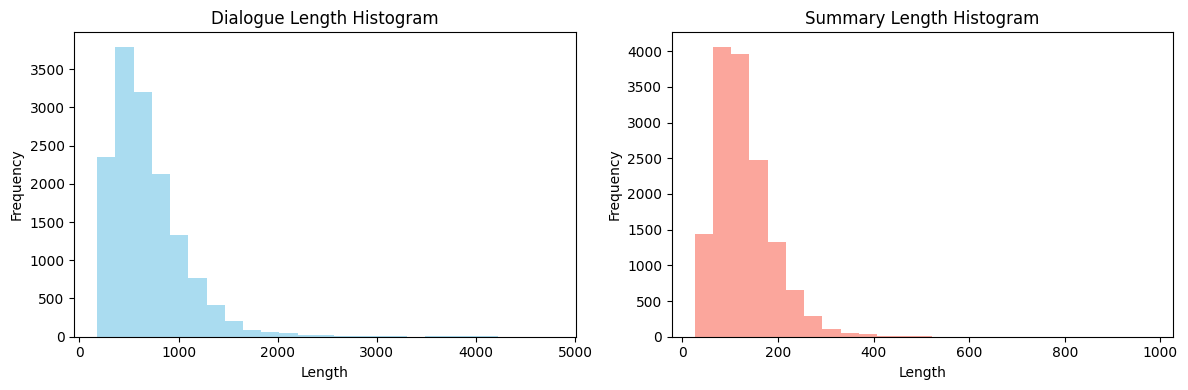

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot histograms for Dialogue Length and Summary Length
df['Dialogue Length'].plot(kind='hist', bins=25, color='skyblue', alpha=0.7, ax=axes[0]) #means you are dividing the length data into 25 groups (bins) for better granularity.
axes[0].set_title('Dialogue Length Histogram') # ax=axes[0] specifies that this histogram will be placed on the first subplot (the left plot)
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

df['Summary Length'].plot(kind='hist', bins=25, color='salmon', alpha=0.7, ax=axes[1]) ##means you are dividing the length data into 25 groups (bins) for better granularity.
axes[1].set_title('Summary Length Histogram')
axes[1].set_xlabel('Length')
axes[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()  #This adjusts the layout of the plots to ensure that there is enough space between them
#and that the titles, labels, and axes are properly displayed
plt.show()


Left side: This tells you how long (in terms of character count or word count) the dialogues are, and how often certain dialogue lengths occur in your dataset.


Right side:  This will give you an idea of how long (in terms of characters or words) the summaries are. Summaries tend to be shorter than dialogues, so you might see that most summaries are concentrated in the shorter range.


We can see the outliers in both columns which should not be a problem

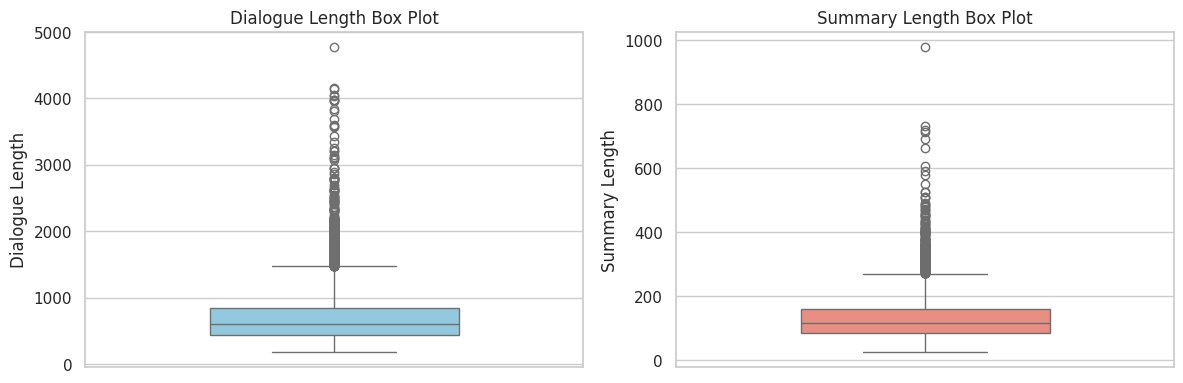

In [ ]:
import matplotlib.pyplot as plt    #for general plotting
import seaborn as sns          # for creating aesthetically pleasing and more advanced plots, which is built on top of matplotlib

# Set the style for seaborn
sns.set(style="whitegrid")     #This sets the style of the plots to a grid with a white background,

# Create a figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # nrows=1 and ncols=2 specify that you want 1 row of plots and 2 columns (i.e., two plots side by side).
                # sets the size of the entire figure to 12 inches wide and 4 inches tall.

# Plot box plots for Dialogue Length and Summary Length with customized appearance
sns.boxplot(y=df['Dialogue Length'], ax=axes[0], color='skyblue', width=0.5) # Sets the width of the box in the plot to 0.5 (controls the size of the box plot).
axes[0].set_title('Dialogue Length Box Plot')
axes[0].set_ylabel('Dialogue Length')

sns.boxplot(y=df['Summary Length'], ax=axes[1], color='salmon', width=0.5)
axes[1].set_title('Summary Length Box Plot')
axes[1].set_ylabel('Summary Length')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()




The median (middle value) of the data, represented by the line inside the box.


The interquartile range (IQR), which is the distance between the 25th percentile (Q1) and the 75th percentile (Q3). This is represented by the box itself.


Whiskers, which extend from the box and show the range of values (excluding outliers).


Outliers, which are typically represented as dots or points outside the whiskers.

In [ ]:
# Drop the 'dialogue length' and 'summary length' columns from the DataFrame
df.drop(columns=['Dialogue Length', 'Summary Length'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dialogue  14460 non-null  object
 1   summary   14460 non-null  object
dtypes: object(2)
memory usage: 226.1+ KB


## Data Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and temp_data
train, temp = train_test_split(df, test_size=0.3, random_state=42)
# Split the temp_data into test and validation
test, val = train_test_split(temp, test_size=0.5, random_state=42)

# Print the sizes of the datasets
print("Train dataset size:", len(train))
print("Test dataset size:", len(test))
print("Validation dataset size:", len(val))


Train dataset size: 10122
Test dataset size: 2169
Validation dataset size: 2169


Training: Your model learns from the training data. It doesn't know about the validation or test data at all.


Validation: You use validation data to tune hyperparameters and make sure the model doesn't overfit. Overfitting happens when the model learns the training data too well (including noise or irrelevant details) and performs poorly on new data.


Test: After training and tuning, you evaluate the model on the test data to see how it performs on completely new, unseen data. This is the final evaluation of the model's generalizability.

In [ ]:
# Transforming dataframes into datasets
!pip install datasets
from datasets import Dataset
train_ds = Dataset.from_pandas(train)    # BART require datasets in a specific format (datasets.Dataset) to efficiently process and train the models.
test_ds = Dataset.from_pandas(test)
val_ds = Dataset.from_pandas(val)

# Visualizing results
print(train_ds)
print('\n' * 2)
print(test_ds)
print('\n' * 2)
print(val_ds)

Dataset({
    features: ['dialogue', 'summary', '__index_level_0__'],
    num_rows: 10122
})



Dataset({
    features: ['dialogue', 'summary', '__index_level_0__'],
    num_rows: 2169
})



Dataset({
    features: ['dialogue', 'summary', '__index_level_0__'],
    num_rows: 2169
})


In [ ]:
train_ds[0] # Visualizing the first row  #train_ds is a Hugging Face Dataset object containing the training data.

{'dialogue': 'Person1 Youve decided that you definitely want to purchase this particular one Person2 To be honest I havent really done much research Person1 I would recommend that you at least glance through these brochures just to make sure that you have selected the right policy for you Take your time Sir Person2 Thanks for your advice after going through all of these materials Ive decided not to go with my initial choice Person1 Of course Sir If I could have your details again and your ID Ill check them and we can go on',
 'summary': 'Person1 recommends Person2 to have a look before making a decision Person2 takes the advice and decides not to go with the initial choice',
 '__index_level_0__': 8124}

id: A unique identifier for this entry (train_8124).

dialogue: The full conversation between two people.

summary: A short summary of the dialogue, capturing the key points.

topic: The main theme of the conversation ("make a choice").

__index_level_0__: An internal index for the dataset (not important for analysis).

## Modelling

In [ ]:
# Loading summarization pipeline with the bart-large-cnn model
summarizer = pipeline('summarization', model = 'facebook/bart-large-xsum')

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The lines like config.json, pytorch_model.bin, vocab.json, etc., show the downloading process of necessary files for the BART model. These files include:

config.json: Configuration settings for the model.

pytorch_model.bin: The actual model weights (parameters).

vocab.json and merges.txt: These files help with tokenizing (breaking down text) during the summarization process

This code is setting up a summarization pipeline using a pre-trained BART model (facebook/bart-large-xsum). Once set up, you can pass dialogues or texts into this pipeline, and it will generate a concise summary.

Example 1

In [ ]:
news = '''Problems in the homeowners insurance market pose a systemic threat to housing markets, and solving them will require extensive investments in mitigation. States and the federal government need to substantially increase investments in community risk reduction, home fortification and loss mitigation, and develop strategies to reduce insurers’ overreliance on unregulated, global reinsurance. That is the coverage that insurance companies purchase to offload some of the risk they assume for their policy holders.
Regulators should collect more information about racial homeowner insurance gaps. Historical research into racial discrimination in insurance markets has demonstrated the broad incidence of insurance “redlining,” similar to the denial of mortgages in Black and Hispanic communities. Insurance companies have not been held accountable for this. More research should be done, and regulators should use existing Fair Housing laws to investigate these gaps, and if needed, to correct them.
"When millions of American families simply cannot find or cannot afford insurance coverage for their home, we are all exposed,” said Douglas Heller, the organization's director of insurance. “Not only are uninsured families unprotected, but the economic fabric of entire communities is also at risk if significant portions of residents cannot rebuild after a disaster. Our study should be a wake-up call for lawmakers, insurance and housing regulators, and the nation’s emergency management agencies.”
'''
summarizer(news) # Using the pipeline to generate a summary of the text above

[{'summary_text': 'The National Association of Realtors (NAR) has released a report on the state of homeowners insurance in the United States.'}]

Example 2

In [ ]:
news = '''Israeli Prime Minister Benjamin Netanyahu on Sunday sharply rejected Senate Majority Leader Chuck Schumer’s call for new elections in his country, dismissing the push as “totally inappropriate” and harmful to Israel’s war against Hamas.
The comments are the freshest salvo in an escalating back-and-forth verbal exchange between senior Washington leaders and Israel’s prime minister, who has attracted growing criticism from the Biden administration and many Democratic lawmakers over his handling
of the conflict with Hamas amid international pleas to allow more humanitarian aid to reach Palestinians in Gaza. Netanyahu repeatedly declined to commit to holding early elections during an interview with CNN. He pointed to polling that shows a majority of Israelis want early elections, but only once the war is considered over. Going to elections now, would lead to “at least six months of national paralysis, which means we would lose the war,” Netanyahu said.
'''
summarizer(news) # Using the pipeline to generate a summary of the text above

[{'summary_text': 'US Vice President Joe Biden has called on Israel not to hold early elections, amid a growing rift between the two countries.'}]

Downloading the tokenizer and the model from huggingface library

In [ ]:
checkpoint = 'facebook/bart-large-xsum' # This specifies which pre-trained model to use (facebook/bart-large-xsum).
tokenizer = BartTokenizer.from_pretrained(checkpoint) # The tokenizer converts the input text (e.g., a dialogue)
#into a format that the model can understand (i.e., tokens or numbers).
model = BartForConditionalGeneration.from_pretrained(checkpoint) # This loads the actual BART model that will generate the summary for the input text.

BartModel: This is the core architecture of BART, which consists of two main parts: the encoder and the decoder.

Encoder: It processes the input text (the dialogue) and understands its meaning. It’s made up of multiple layers that help the model learn complex patterns.

Decoder: It generates the output (the summary) based on what the encoder learned. It also has multiple layers to improve the generation process.

BartEncoderLayer: Each layer of the encoder has multiple components that help it better understand the input text

Self-attention: This allows the model to focus on different parts of the input text that are important for understanding the meaning.

Feedforward networks (fc1, fc2): These are mathematical functions that help the model learn complex relationships in the data.

BartDecoderLayer: The decoder also has similar layers but focuses on generating the summary based on what the encoder learned.

lm_head: This is the final part of the model that converts the internal understanding (features) back into human-readable words for the summary.

In [ ]:
print(model) # Visualizing model's architecture

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
    

The "layers" represent different steps or stages of understanding and generating the summary. The more layers, the deeper the model's understanding and ability to generate more accurate summaries.

## Fine Tuning for the dialogue summarization task

In [ ]:
def preprocess_function(examples):
    inputs = [doc for doc in examples["dialogue"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["summary"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs



Labels: The labels["input_ids"] part is where the actual summary is saved in the right format. These "labels" are the answers the model should learn to produce, which are the summaries. So, the function makes sure that each input (dialogue) is paired with its corresponding output (summary).

In [ ]:
# Applying preprocess_function to the datasets
tokenized_train = train_ds.map(preprocess_function, batched=True,
                               remove_columns=['dialogue', 'summary', '__index_level_0__']) # Removing features

tokenized_val = val_ds.map(preprocess_function, batched=True,
                               remove_columns=['dialogue', 'summary', '__index_level_0__']) # Removing features

tokenized_test = test_ds.map(preprocess_function, batched=True,
                               remove_columns=['dialogue', 'summary', '__index_level_0__']) # Removing features

# Printing results
print('\n' * 3)
print('Preprocessed Training Dataset:\n')
print(tokenized_train)
print('\n' * 2)
print('Preprocessed Test Dataset:\n')
print(tokenized_test)
print('\n' * 2)
print('Preprocessed Validation Dataset:\n')
print(tokenized_val)

Map:   0%|          | 0/10122 [00:00<?, ? examples/s]

Map:   0%|          | 0/2169 [00:00<?, ? examples/s]

Map:   0%|          | 0/2169 [00:00<?, ? examples/s]





Preprocessed Training Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10122
})



Preprocessed Test Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2169
})



Preprocessed Validation Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2169
})


The preprocess_function is the function we discussed earlier. It prepares the data (dialogues and summaries) by converting them into a format that the machine learning model can understand.

The code applies this function to three different datasets:

Training dataset (train_ds): This is the data used to teach the model.

Validation dataset (val_ds): This helps test how well the model is learning during training.

Test dataset (test_ds): This is used to evaluate the model after training is complete.

Visualizing the first row from after tokenization from the train dataset

In [ ]:
# Selecting a sample from the dataset
sample = tokenized_train[0]   #This is taking the first item from your preprocessed training data (tokenized_train[0]),
# which contains the tokenized version of the dialogue and summary

# Printing its features
print("input_ids:")  # hello might be represented as 41761
print(sample['input_ids'])  # These are numbers called tokens that represent the words in the dialogue,
# but the model doesn't understand words like we do, so it turns each word into a number.
print("\n")
print("attention_mask:")
print(sample['attention_mask'])
print("\n")
print("sample:")
print(sample['labels'])  #sample is just the converted (tokenized) summary,
#so you can see how the model represents the summary in the same way as the input dialogue.
print("\n")

input_ids:
[0, 41761, 134, 370, 548, 1276, 14, 47, 2299, 236, 7, 2229, 42, 1989, 65, 18404, 176, 598, 28, 5322, 38, 2489, 9399, 269, 626, 203, 557, 18404, 134, 38, 74, 5940, 14, 47, 23, 513, 18969, 149, 209, 34050, 4123, 95, 7, 146, 686, 14, 47, 33, 3919, 5, 235, 714, 13, 47, 4624, 110, 86, 5348, 18404, 176, 4557, 13, 110, 2949, 71, 164, 149, 70, 9, 209, 3183, 38, 548, 1276, 45, 7, 213, 19, 127, 2557, 2031, 18404, 134, 1525, 768, 5348, 318, 38, 115, 33, 110, 1254, 456, 8, 110, 4576, 12285, 1649, 106, 8, 52, 64, 213, 15, 2]


attention_mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


sample:
[0, 41761, 134, 10827, 18404, 176, 7, 33, 10, 356, 137, 442, 10, 568, 18404, 176, 1239, 5, 2949, 8, 11703, 45, 7, 213, 19, 5, 2

In [ ]:
# Instantiating Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

the DataCollatorForSeq2Seq is making sure that the data (dialogues and summaries) fit into the model in a uniform way, with padding where necessary, and the attention mask ensures the model doesn’t get confused by the padding

Loading evaluation metrics

In [ ]:
!pip install rouge_score  #ROUGE stands for Recall-Oriented Understudy for Gisting Evaluation.

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=6615d020f79e98fad02fef9cdcab423d59759935293ac6079c8656af424d8643
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install evaluate --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install datasets --upgrade
from evaluate import load

metric = load("rouge")       #we're loading the ROUGE metric,
# which will allow us to evaluate how good the model-generated summaries are by comparing them to the true summaries.

Below is a function to compute the metrics

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Decoding predictions
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)


    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]
    #ROUGE requires a newline after each sentence. So we use the NLTK library to split the sentences and join them with a newline.


    # Computing rouge score
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

    # Add mean-generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()} #Finally, we round the ROUGE scores to 4 decimal places for clarity, and return the result.

The compute_metrics function evaluates model predictions against true labels using the ROUGE metric, which measures the quality of generated text.
Here’s a brief overview:

Input: Takes predictions and true labels.

Decoding: Converts token IDs back to text while skipping special tokens.

Label Processing: Replaces masked tokens with padding and decodes labels.

Formatting: Prepares the text for ROUGE evaluation by joining sentences with newlines.

ROUGE Calculation: Computes ROUGE scores to assess the quality of predictions.

Length Calculation: Computes the average length of generated summaries.
Return: Outputs the scores rounded to four decimal places.

Defining Trianing arguments

In [ ]:
#defines how we want to train our model.
training_args = Seq2SeqTrainingArguments(
    output_dir = 'dialoguesum', #This specifies where to save the model after training. it's saving to a folder called 'dialoguesum'.
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    load_best_model_at_end = True, #After training is done, the model with the best performance (based on how well it did on the validation set) will be kept.
    metric_for_best_model = 'eval_loss', #The evaluation loss will be used to determine the best model. The lower the loss, the better the model is.
    #seed = seed,
    learning_rate=2e-5,
    per_device_train_batch_size=4,   # It means we process 4 examples at once during training. (This is called the batch size.)
    per_device_eval_batch_size=4,  # Same as the training batch size, but this is for the evaluation (testing) part.
    gradient_accumulation_steps=2, #This helps us manage memory. Instead of updating the model after each batch, it waits for 2 batches before making an update, making the training more efficient.
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=2,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

In [ ]:
# Defining Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
# Checking if GPU is available
if torch.cuda.is_available():
    print("GPU is available. \nUsing GPU")
    device = torch.device('cuda')
else:
    print("GPU is not available. \nUsing CPU")
    device = torch.device('cpu')

GPU is available. 
Using GPU


## Training

In [ ]:
trainer.train() # Training model

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
0,1.457600,1.536329,50.493600,24.986300,41.661500,41.656600,35.768100
1,1.090000,1.463293,51.067800,25.747600,42.452900,42.453500,36.047900


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight'

TrainOutput(global_step=2530, training_loss=1.3201862606606465, metrics={'train_runtime': 3315.9414, 'train_samples_per_second': 6.105, 'train_steps_per_second': 0.763, 'total_flos': 9806817079492608.0, 'train_loss': 1.3201862606606465, 'epoch': 2.0})

## Evaluating the results

In [ ]:
from tqdm import tqdm
from rouge_score import rouge_scorer

# Initialize an empty list to store the evaluation results
evaluation_results = []

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer.model.to(device)

# Initialize a ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Evaluate model performance on the tokenized validation dataset
for i, example in enumerate(tqdm(test_ds, desc="Evaluating", unit=" examples")):
    # Tokenize the input text
    inputs = tokenizer(example['dialogue'], return_tensors="pt", truncation=True, max_length=512, padding="max_length").to(device)

    # Generate summary
    summary_ids = trainer.model.generate(inputs.input_ids, max_length=50, num_beams=30)
    predicted_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Calculate ROUGE scores
    scores = scorer.score(predicted_summary, example['summary'])

    # Append the evaluation results to the list
    evaluation_results.append({'Actual Text': example['dialogue'],
                               'Summarized Text': example['summary'],
                               'Predicted Text': predicted_summary,
                               'ROUGE-1 F1': scores['rouge1'].fmeasure,
                               'ROUGE-2 F1': scores['rouge2'].fmeasure,
                               'ROUGE-L F1': scores['rougeL'].fmeasure})

    # Display only the first 10 results
    if i == 9:
        break

# Create a DataFrame from the evaluation results
df = pd.DataFrame(evaluation_results)

df

Evaluating:   0%|          | 9/2169 [05:26<21:44:48, 36.24s/ examples]


,Actual Text,Summarized Text,Predicted Text,ROUGE-1 F1,ROUGE-2 F1,ROUGE-L F1
0,Person1 Excuse me Is anyone sitting here Person2 No nobody Person1 You dont mind if I smoke do you Person2 Well to be frank yes I do Person1 Oh Im sorry But this isnt a nosmoker is it I mean would you mind if I smoke here Person2 Actually it is Perhaps you havent noticed the sign Person1 Sign Whats sign Person2 There on the window Person1 Oh sorry I didnt notice it Sorry Person2 Thats all right,Person1 wants to smoke but Person2 reminds Person1 that smoking is not allowed here,A group of people have been having a cigarette in a cafe in London.,0.000000,0.000000,0.000000
1,Person1 Im so frustrated Person2 whats wrong Jim Person1 I called the electronics shop to find out what time they close and it took me twenty minutes to get what I wanted Person2 Twenty minutes just to find out what their business hours are Person1 yes They have some sort of digital receptionist So when I called in a machine told me to push a button for the department I wanted to be transferred to Person2 Oh I hate getting voicemail instead of a person What did you do Person1 I just kept pushing buttons I was transferred to customer service but there a machine told me to choose between technical help warranty information or price information Person2 Couldnd you choose to be transferred to a real person Person1 Eventually I did get to a real person I found out the closing time but by then the store had already closed,Jim tells Person2 hes so frustrated because it took twenty minutes to get the closing time when he called the electronics shop,A man has been complaining about the time it takes to get help at an electronics shop.,0.358974,0.108108,0.256410
2,Person1 How can you keep in touch with your aunt in America Person2 Oh I make a phone call once a month Person1 Its very expensive right Person2 Yeah Person1 Why not send Email through the Internet Person2 Is it convenient and cheap Person1 Sure You can send Email to each other every day through the internet In addition you can make a phone call through the internet too Person2 Really Im so glad to hear that But I dont konw how to get access to the Internet Could you show me Person1 No problem Ill tell you Person2 Ill appreciate it very much,Person1 tells Person2 Person2 can keep in touch with Person2s aunt in America through the internet and willing to show Person2 how,A group of people were talking on the phone about how to keep in touch with each other.,0.350000,0.157895,0.200000
3,Person1 I usually get a lot of information on the computer and use Email to send messages to my friends Person2 Me too Recently Im fascinated with netchat Ive made many friends on the net Every day I talk to them and share many interesting things with them I really enjoy it Person1 Dont you think its a sheer waste of both time and money Person2 Im afraid not Every coin has two sides I think using internet has a great deal to do with human interaction,Person1 and Person2 are talking about netchat Person2 thinks it has both advantages and disadvantages,A group of people have been discussing whether or not using the internet is a waste of time and money.,0.057143,0.000000,0.057143
4,Person1 Ive brought a little dog for Alice girls usually like looking after pets Person2 Thank you but Alice is only a visitor here I dont know if shell keep it Person1 To tell you the truth the dog isnt my real reason for coming I want to ask Alice if shed like to be my girlfriend Person2 Really,Person1s brought a dog for Alice and will ask her to be his girlfriend Person2s surprised,"A group of people are sitting on a bench in a park, looking at a dog.",0.125000,0.066667,0.125000
5,Person1 Hi Megan How are you Have you seen the doctor Person2 No its not about me Its about Bonzo Person1 What happened Person2 I was playing football with Bonzo in the garden and the ball went over the garden into the road When Bonzo was running after it he got hit by a car Person1 Oh no Didnt t

# deploying

In [ ]:
!pip install gradio transformers  # Ensure necessary libraries are installed

import gradio as gr
from transformers import BartTokenizer, BartForConditionalGeneration

# Load pre-trained model and tokenizer
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

def summarize_dialogue(dialogue):
    """Summarizes a dialogue using the pre-trained model."""

    # Tokenize the input dialogue (increase max_length to handle longer inputs)
    inputs = tokenizer(dialogue, return_tensors="pt", truncation=True, max_length=1024, padding=True)

    # Generate summary using the model (increase max_length for summary and num_beams for better quality)
    summary_ids = model.generate(
        inputs.input_ids,
        max_length=150,   # Allow for a longer summary
        min_length=40,    # Ensure summary has at least some length
        num_beams=6,      # Use more beams for higher-quality summary
        early_stopping=True
    )

    # Decode the generated summary to text, skipping special tokens
    predicted_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return predicted_summary

# Gradio Interface
iface = gr.Interface(
    fn=summarize_dialogue,
    inputs=gr.Textbox(lines=5, placeholder="Enter your dialogue here..."),
    outputs=gr.Textbox(label="Summary"),
    title="Dialogue Summarizer",
    description="Enter a dialogue, and the model will generate a concise summary."
)

# Launch the Gradio interface
if __name__ == "__main__":
    iface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b45e54fdc5faf2f87d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Hey, did you hear that Mike and Emma are going to Paris next week? They’re planning to visit the Eiffel Tower and the Louvre Museum. They’ll be flying from New York on Friday, December 10th. I think they’ll be staying at a hotel near the Eiffel Tower. It’s going to be such an amazing trip!

Libraries:

gradio: A library for building user interfaces easily.
transformers: A library that provides pre-trained models and tokenizers for natural language processing tasks.

Model Loading:

The code loads the BART model (facebook/bart-large-cnn), which is specifically designed for text summarization, along with its tokenizer.

Summarization Function:

The summarize_dialogue function takes a dialogue as input, tokenizes it, and generates a summary.

It uses settings like max_length=256 for input and generates a summary with max_length=40 using num_beams=4, which controls the complexity of the summary generation.

Gradio Interface:

The Gradio interface allows users to input text (dialogue) in a textbox.
Once the input is provided, it calls the summarize_dialogue function to produce a summary.

The application has a title and description to guide users on how to use it.
Execution:

The interface launches when the script runs, allowing users to interact with it through a web browser.

## Conclusion



*   In this project, we successfully developed an advanced abstractive dialogue summarization tool that integrates several key features to enhance user experience and the utility of the summaries generated.



*   By leveraging a comprehensive preprocessing pipeline, we ensured that the input dialogues were cleaned and prepared effectively for analysis. This step was crucial in optimizing the performance of our summarization model, allowing it to generate more coherent and contextually relevant summaries.

*   The integration of emotion and sentiment detection added another layer of insight, enabling users to understand not just the content of the dialogues, but also the emotional undertones. This feature enhances the tool’s applicability in various fields, such as customer service, mental health, and communication analysis, where understanding the emotional context is vital.

*   Deploying the application using Gradio allowed for an intuitive user interface, making it accessible for users to input dialogues and receive immediate summaries . This accessibility encourages broader use and experimentation, facilitating real-time feedback and interaction.




